Autor : Ricardo Félix Díaz López

Date : 25/12/2023

Mail : ricardod671@gmail.com

In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
#import graph_zfactor.utils.paths
import math
import matplotlib.pyplot as plt

# Process Flow Diagram for secant_method Function

## Start
- Begin the process.

## Initialize Variables
- Set initial values: `x0`, `x1`, `tol`, and `max_iter`.

## Iterative Loop
- For each iteration (up to `max_iter`):
  - Calculate function values `fx0` and `fx1`.
  - Check for convergence: `abs(fx1) < tol`.
    - If true, return `x1` as the approximate root.
  - Update root approximation `x` using the secant method formula.
  - Check for convergence: `abs(x - x1) < tol`.
    - If true, return `x` as the approximate root.
  - Update `x0` and `x1` for the next iteration.

## Convergence Failure
- If the loop completes without convergence, raise a `ValueError` indicating convergence failure.

## End
- End the process.



### Implementacion of secant method

In [7]:
def secant_method(f, x0, x1, tol=1e-4, max_iter=700):
    """
    Implements the iterative method of secant for finding a root of a function.

    Args:
        f: the function to find the root of.
        x0, x1: the initial guesses for the root.
        tol: the tolerance for the solution.
        max_iter: the maximum number of iterations.

    Returns:
        The approximate root of the function.
    """
    for i in range(max_iter):
        fx0 = f(x0)
        fx1 = f(x1)
        if abs(fx1) < tol:
            return x1
        x = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        if abs(x - x1) < tol:
            return x
        x0, x1 = x1, x
    raise ValueError("The method failed to converge.")

# Process Flow Diagram for z_factor Function

## Start
- Begin the process.

## Read ppr and tpr
- Read the values of `ppr` (Pseudo Reduced Pressure) and `tpr` (Pseudo Reduced Temperature).

## Define Constants
- Define the constants used in the equation of state.

## Define Subequations
- Write the subequations of the equation of state.

## Define Equation of State
- Assemble the equation of state using the defined constants and subequations.

## Define Function f(z)
- Write the function `f(z)` representing the equation of state.

## Find Root with Secant Method
- Use the secant method to find the root of the equation of state.

## Return Root
- Return the found root as the Z factor of the gas.

## End
- End the process.


In [8]:
def z_factor(ppr,tpr):
    ''' 
    Calculate the z factor of gas (z_factor), it is used the Dranchuk and Abou-Kassen
    equation of state,more especifically find the root of the equuation of state with 
    the secant method.
    
    Args:
        ppr (float): Pseudo reduced pressure (dimensionless).
        tpr (float): Pseudo reduced Temperature (dimensionless).

    Returns:
        z_factor (float): Z factor of gas (dimensionless).
     '''
    
    '''
    The firts step is read the ppr and tpr 
    '''

    ppr_z= ppr
    tpr_z= tpr

    '''
    The next step is write the equation of state, and is more easy did it by parts.
    '''
    
    def f(z):
        # Constans of the equation of state.
        A1 = 0.3265
        A2 = -1.0700
        A3 = -0.5339
        A4 = 0.01569
        A5 = -0.05165
        A6 = 0.5475
        A7 = -0.7361
        A8 = 0.1844
        A9 = 0.1056
        A10 = 0.6134
        A11 = 0.7210

        # Writting the subequations of equation of state.
        density_ro = 0.27 * (ppr_z / (z * tpr_z))
        c1_tpr = A1 + (A2 / tpr_z) + (A3 / tpr_z**3) + (A4 / tpr_z**4) + (A5 / tpr_z**5)
        c2_tpr = A6 + (A7 / tpr_z) + (A8 / tpr_z**2)
        c3_tpr = A9 * ((A7 / tpr_z) + (A8 / tpr_z**2))
        c4_tpr_ro = A10 * (1 + (A11 * density_ro**2)) * (density_ro**2 / tpr_z**3) * math.exp(-A11 * density_ro**2)

        # Writting the equation of state.
        funtion_fz = z - (1 + (c1_tpr * density_ro) + (c2_tpr * density_ro**2) - (c3_tpr * density_ro**5) + c4_tpr_ro)

        return funtion_fz
    
    # Finding the root with the method of secant, in this case I select a seeds of 0.5 and 1(case of ideal gas)

    root = secant_method(f,0.5,1)

    return root

In [9]:
z_factor(tpr=3.0,ppr=1)

0.9983141820632608

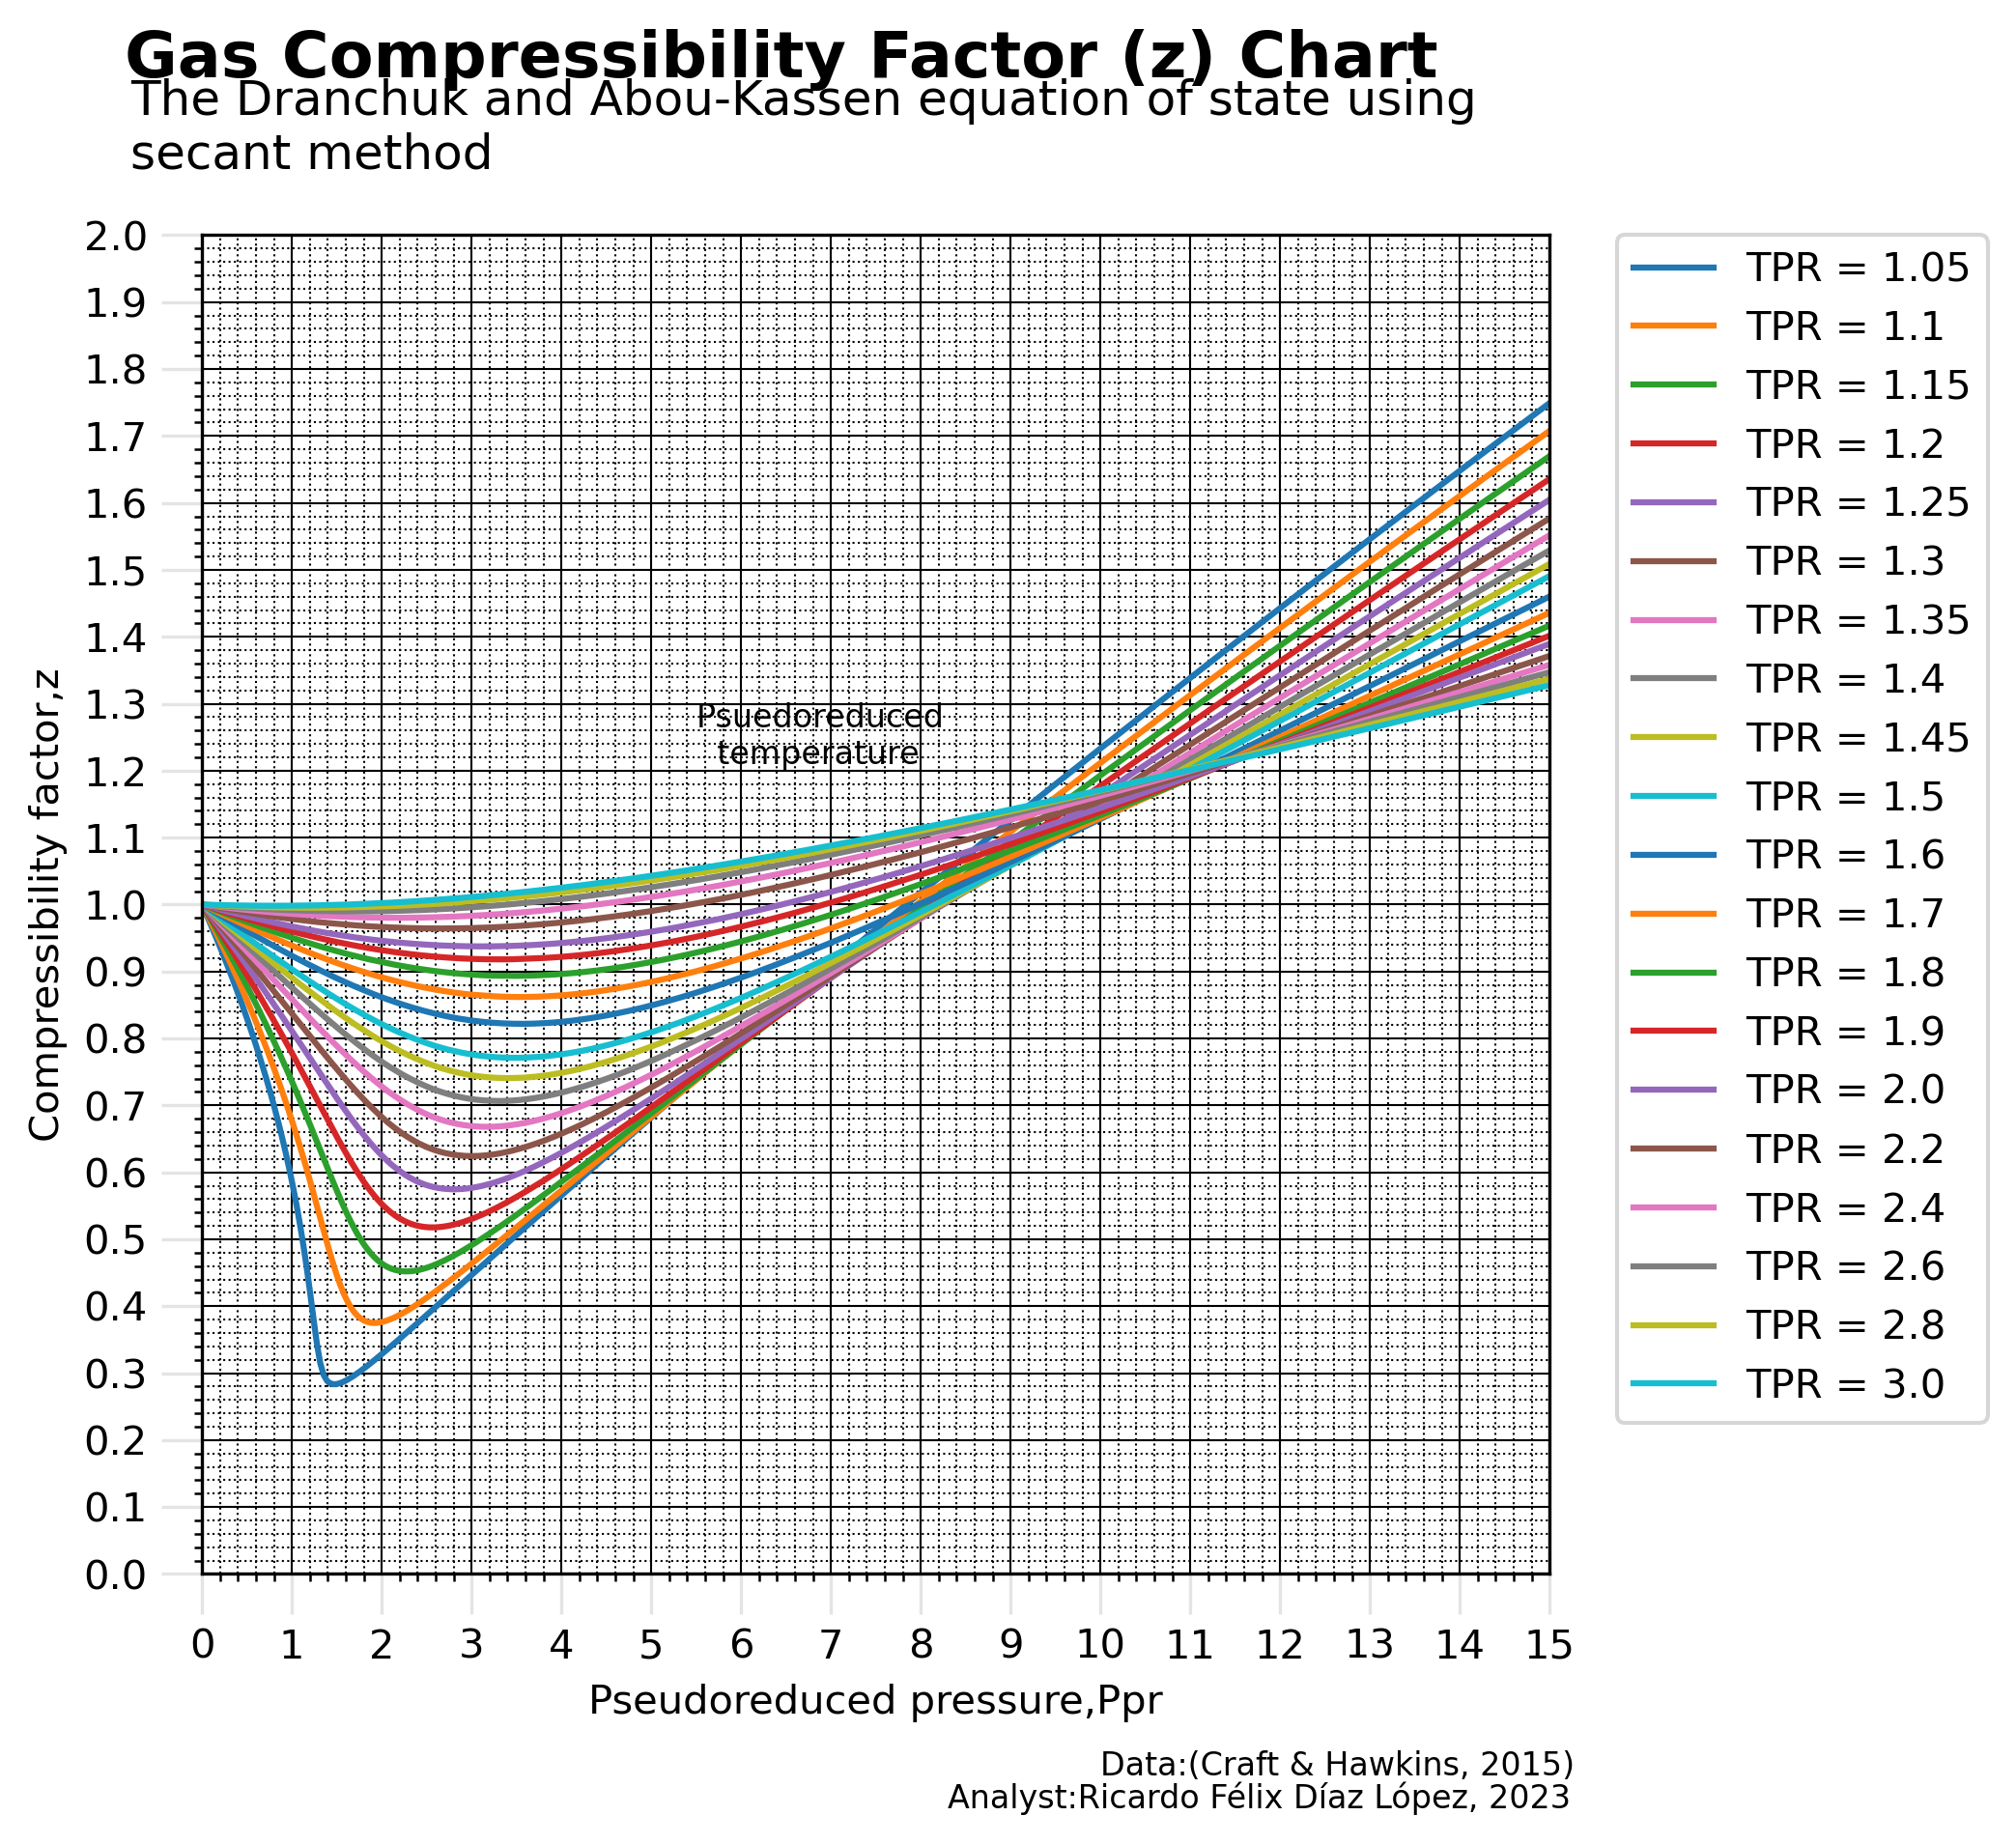

In [10]:
"""
Compresibility Gas Factor from 0 to 15 Ppr
"""

#backgrouned info and defining the graph
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
fig.patch.set(facecolor='white')

# setting axis limits
ax.set_xlim(0,15)
ax.set_ylim(0,2)

# setting the ticks
ax.set_xticks(range(16))
ax.set_yticks([i/10 for i in range(21)], [f'{i/10}' for i in range(21)])

# setting as our backgroun as  milimeter paper
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# Preparing the tpr values
tpr_values = [
    1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5,
    1.6, 1.7, 1.8, 1.9, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0
]


# Creating the points of ppr values to graph
ppr_values = np.linspace(0, 15, 400)

# time to graph the 2-D plot 
for tpr_value in tpr_values:
    z_factor_values = [z_factor(ppr, tpr_value) for ppr in ppr_values]
    ax.plot(ppr_values,
            z_factor_values,
            label=f'TPR = {tpr_value}')

# extending horizontal tickmarks
ax.tick_params(which='major',
               length=10,
               color= '#E4E4E4')

# Adding the title 
ax.set_title("Gas Compressibility Factor (z) Chart",
             fontsize=16,
             x=0.43,
             y=1.1,
             fontweight='bold')

# Adding the axis labels 
ax.set_ylabel("Compressibility factor,z")
ax.set_xlabel("Pseudoreduced pressure,Ppr")

# Adding the subtitle
ax.text(s = 'The Dranchuk and Abou-Kassen equation of state using \nsecant method',
        x = -0.8,
        y = 2.1,
        fontsize = 12)

# Adding me
ax.text(s = 'Analyst:Ricardo Félix Díaz López, 2023',
        x = 8.3,
        y = -0.35,
        fontsize = 8)

# Adding the source of data
ax.text(s = 'Data:(Craft & Hawkins, 2015)',
        x = 10,
        y = -0.3,
        fontsize = 8)

# Adding the Tpr
ax.text(s = 'Psuedoreduced \n  temperature',
        x = 5.5,
        y = 1.21,
        fontsize = 8)

# Adding the legend
ax.legend(bbox_to_anchor=(1.05, 1),
          loc='upper left',
          borderaxespad=0.)

# adjust resolution (dpi)
#plt.gcf().set_dpi(300)

# save figure
#plt.savefig('factor char from 0 to 15', dpi=300, bbox_inches='tight')

plt.show();

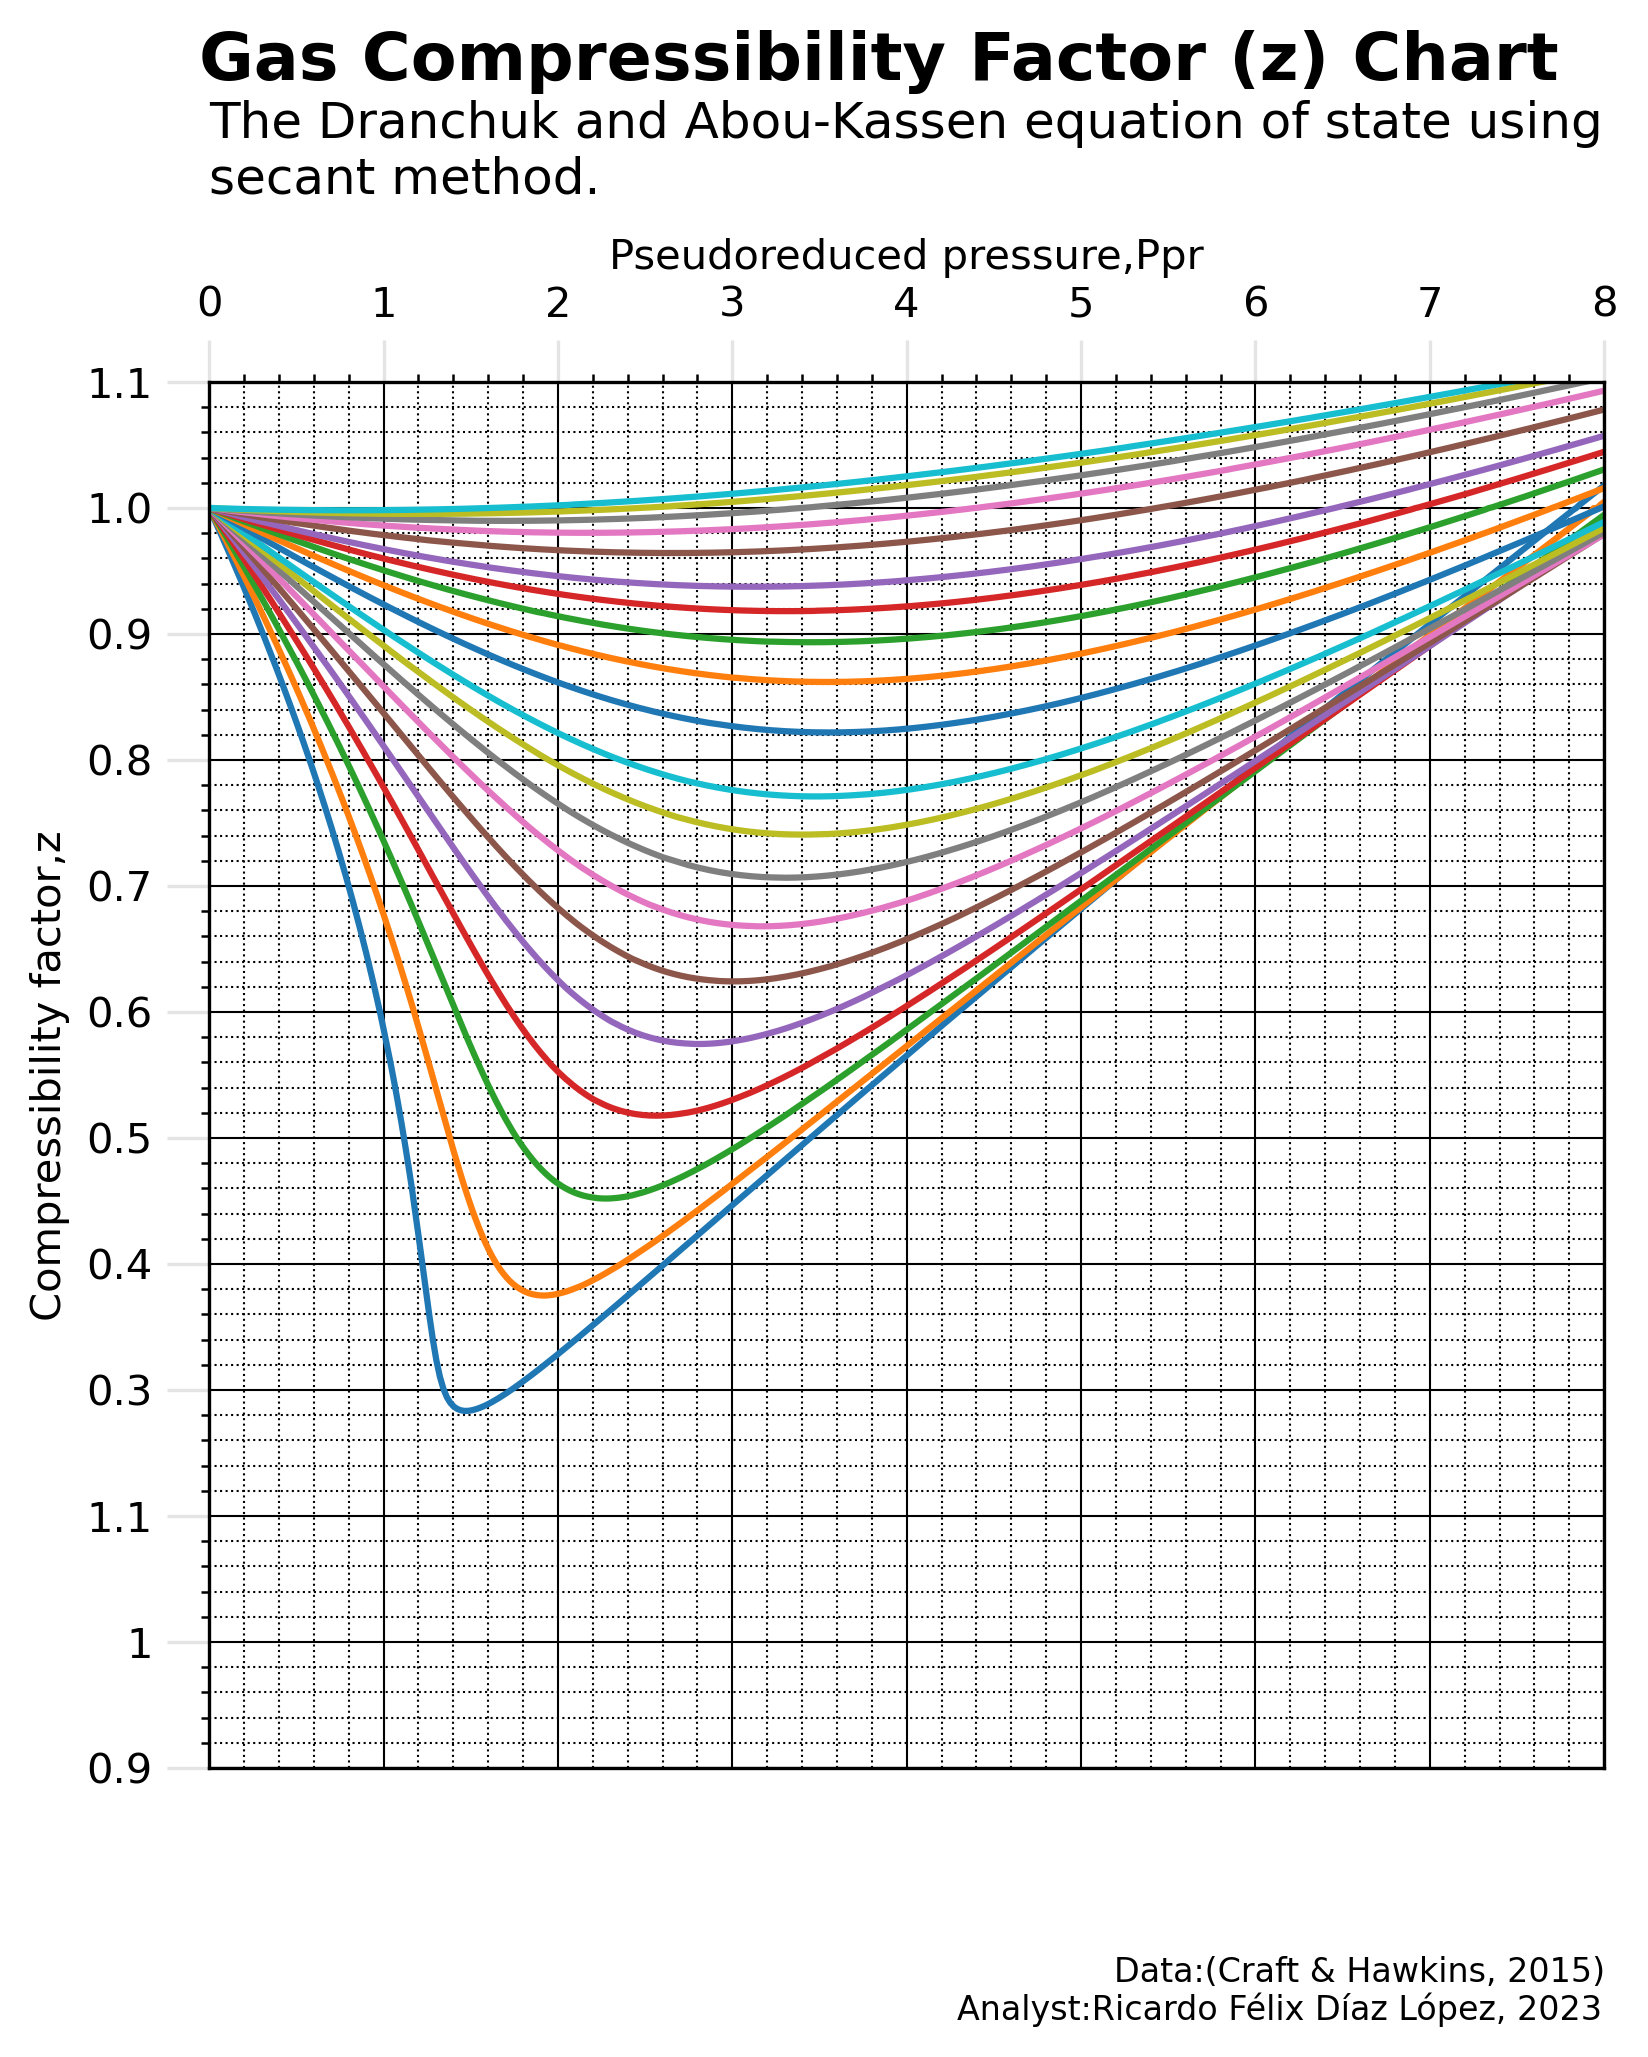

In [15]:
"""
Compresibility Gas Factor from 0 to 8 Ppr and z from 0 to 1.1
"""

#backgrouned info and defining the graph
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
fig.patch.set(facecolor='white')

# setting axis limits
ax.set_xlim(0,8)
ax.set_ylim(0,1.1)

# setting the ticks
ax.set_xticks(range(9))
ax.set_yticks([i/10 for i in range(12)], [f'{i/10}' for i in range(12)])

# Changing the axis y labels
ax.set_yticklabels([0.9, 1, 1.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1])

# setting as our backgroun as  milimeter paper
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# Preparing the tpr values
tpr_values = [
    1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5,
    1.6, 1.7, 1.8, 1.9, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0
]

# Creating the points of ppr values to graph
ppr_values = np.linspace(0, 8, 400)

# time to graph the 2-D plot 
for tpr_value in tpr_values:
    z_factor_values = [z_factor(ppr, tpr_value) for ppr in ppr_values]
    ax.plot(ppr_values,
            z_factor_values,
            label=f'TPR = {tpr_value}')

# extending horizontal tickmarks
ax.tick_params(which='major',
               length=10,
               color= '#E4E4E4')

# Adding the axis labels 
ax.set_ylabel("Compressibility factor,z")
ax.set_xlabel("Pseudoreduced pressure,Ppr")

# changin to the top the axis
ax.xaxis.tick_top()

# Changing the x label position to the top
ax.xaxis.set_label_position('top')

# Adding the title 
ax.set_title("Gas Compressibility Factor (z) Chart",
             fontsize=16,
             x=0.48,
             y=1.2,
             fontweight='bold')

# Adding the subtitle
ax.text(s = 'The Dranchuk and Abou-Kassen equation of state using \nsecant method.',
        x = 0,
        y = 1.25,
        fontsize = 12)

# Adding me
ax.text(s = 'Analyst:Ricardo Félix Díaz López, 2023',
        x = 4.29,
        y = -0.2,
        fontsize = 8)

# Adding the source of data
ax.text(s = 'Data:(Craft & Hawkins, 2015)',
        x = 5.19,
        y = -0.17,
        fontsize = 8)

# adjust resolution (dpi)
#plt.gcf().set_dpi(300)

# save figure
#plt.savefig('factor char from 0 to 8', dpi=300, bbox_inches='tight')

plt.show();

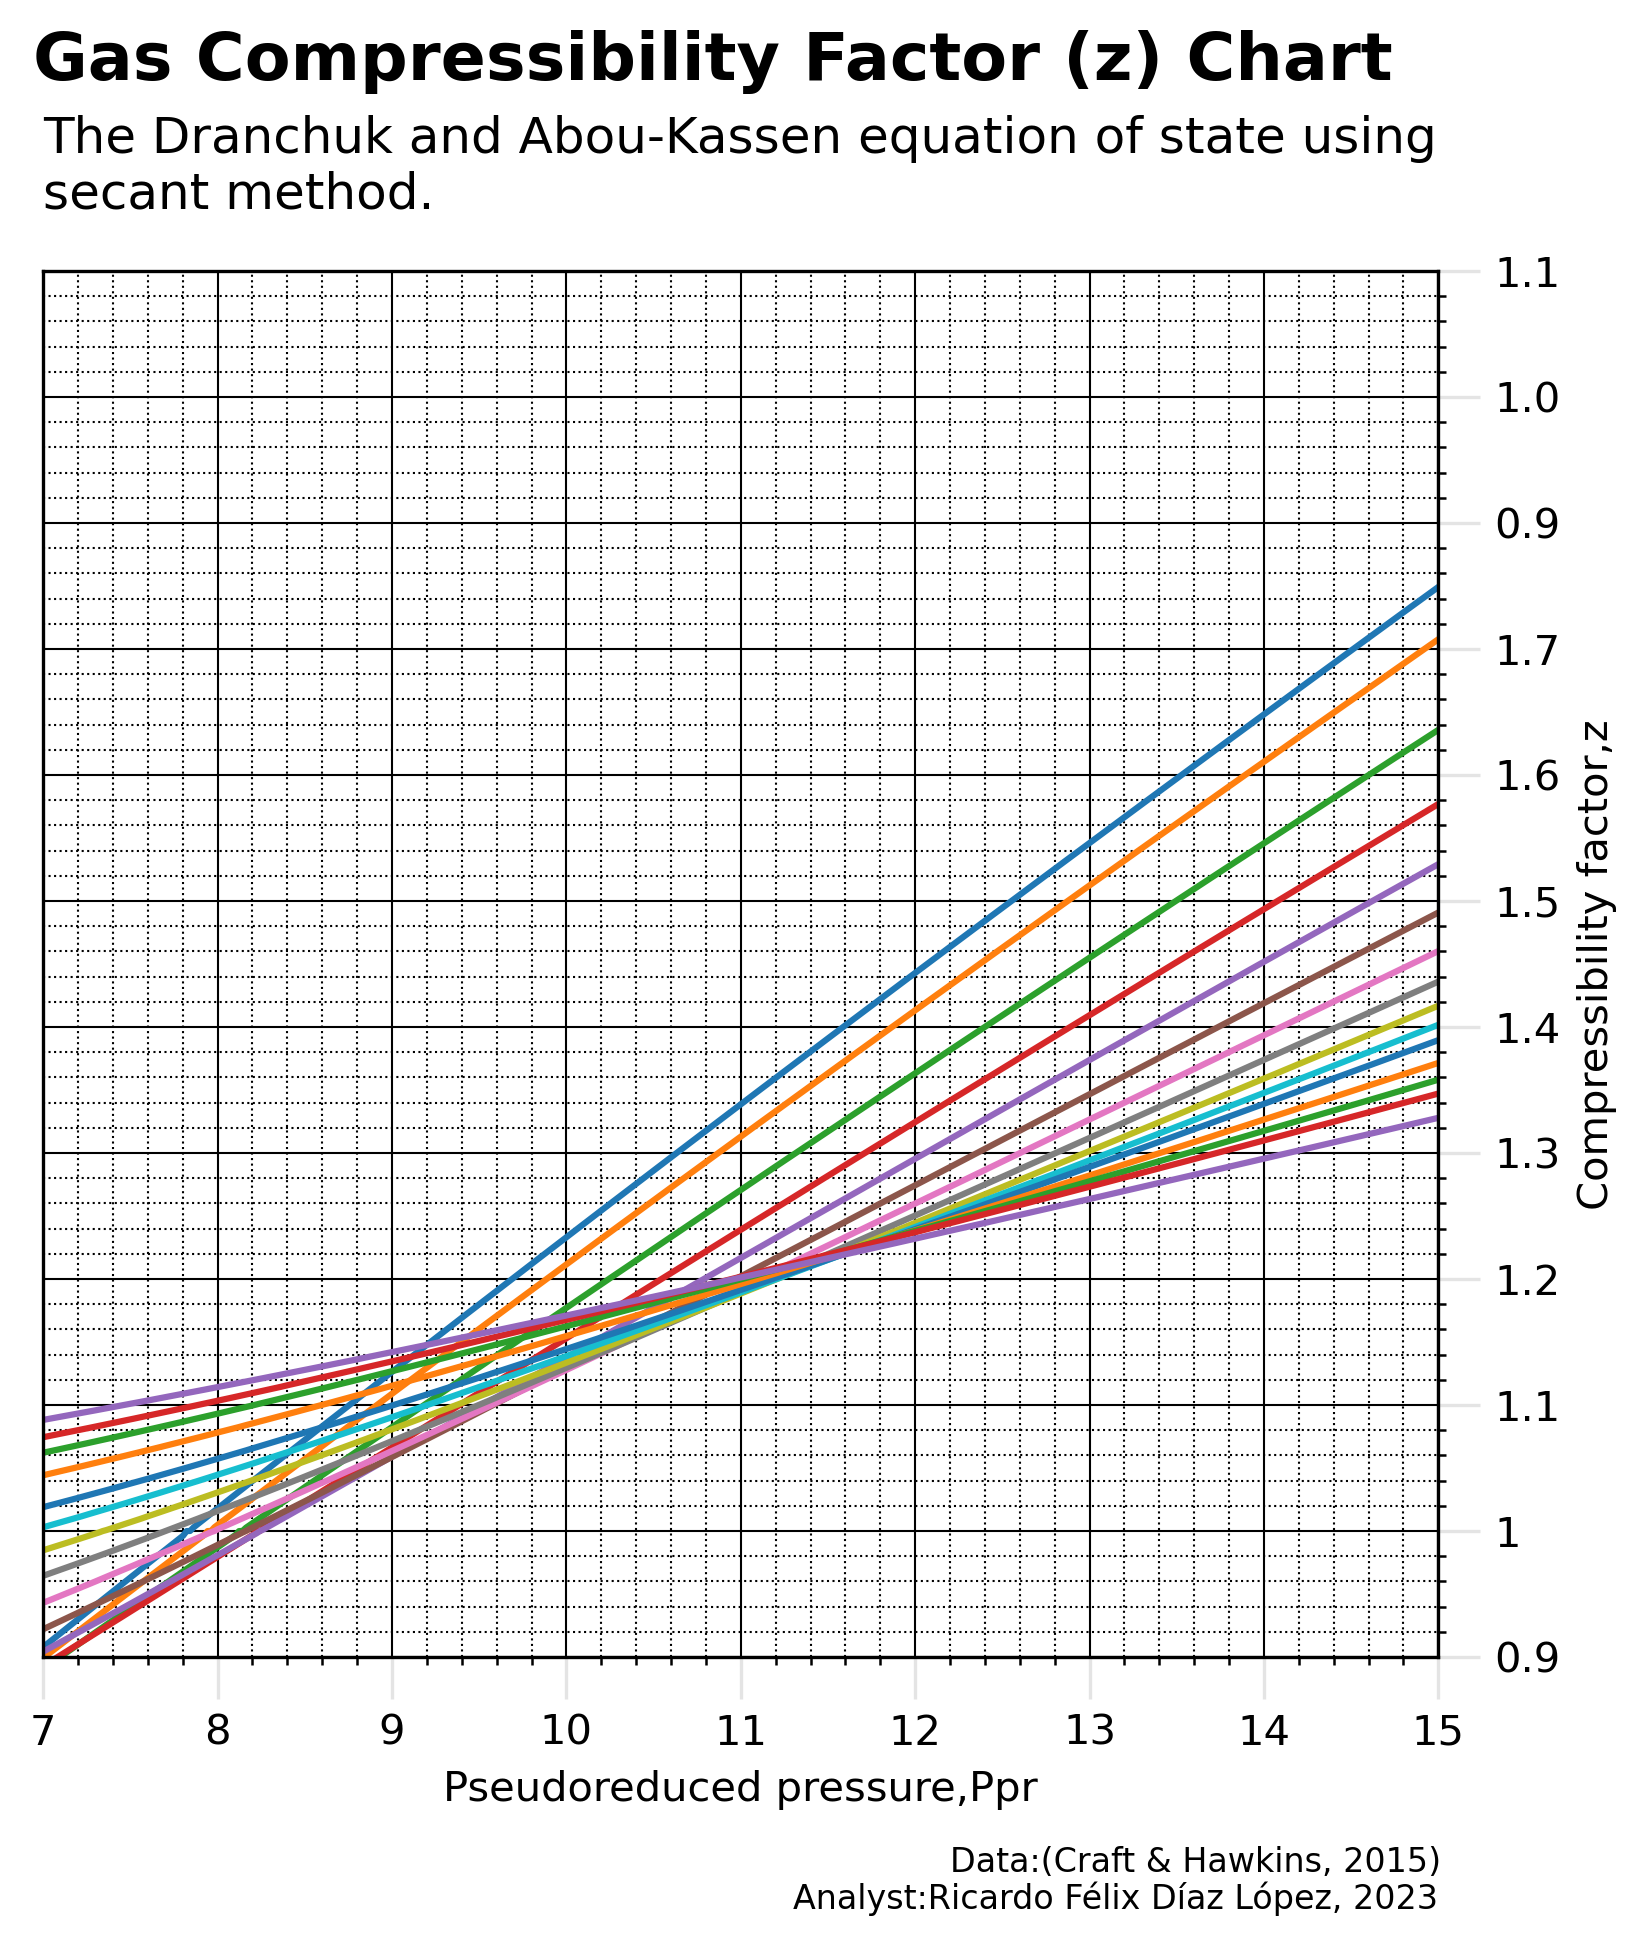

In [16]:
#backgrouned info and defining the graph
fig = plt.figure(figsize=(6,6))
ax2 = fig.add_subplot(1,1,1)
fig.patch.set(facecolor='white')

# setting axis limits of second figure
ax2.set_xlim(7,15)
ax2.set_ylim(0.9,2)

# setting the ticks of second figure
ax2.set_xticks(range(7,16))
ax2.set_yticks([i/10 for i in range(9,21)], [f'{i/10}' for i in range(9,21)])

# Changing the axis y labels of second figure
ax2.set_yticklabels([0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 0.9, 1.0, 1.1])

# setting as our backgroun as  milimeter paper for second figure
ax2.minorticks_on()
ax2.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax2.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# Preparing the tpr values for second figure
tpr_values_2 = [
    1.05, 1.1, 1.2, 1.3, 1.4, 1.5,1.6, 1.7,
    1.8, 1.9, 2.0, 2.2, 2.4, 2.6, 3.0
]

# Creating the points of ppr values to graph for second figure
ppr_values_2 = np.linspace(7, 15, 400)

# time to graph the 2-D plot for second figure
for tpr_value_2 in tpr_values_2:
    z_factor_values_2 = [z_factor(ppr, tpr_value_2) for ppr in ppr_values_2]
    ax2.plot(ppr_values_2,
             z_factor_values_2,
             label=f'TPR = {tpr_value}')

# extending horizontal tickmarks
ax2.tick_params(which='major',
                length=10,
                color= '#E4E4E4')

# Adding the axis labels of second figure
ax2.set_ylabel("Compressibility factor,z")
ax2.set_xlabel("Pseudoreduced pressure,Ppr")

# changin to the top the axis of second figure
ax2.yaxis.tick_right()

# Changing the x label position to the top of second figure
ax2.yaxis.set_label_position('right')

# Adding the title 
ax2.set_title("Gas Compressibility Factor (z) Chart",
              fontsize=16,
              x=0.48,
              y=1.12,
              fontweight='bold')

# Adding the subtitle
ax2.text(s = 'The Dranchuk and Abou-Kassen equation of state using \nsecant method.',
         x = 7,
         y = 2.05,
         fontsize = 12)

# Adding me
ax2.text(s = 'Analyst:Ricardo Félix Díaz López, 2023',
         x = 11.3,
         y = 0.7,
         fontsize = 8)

# Adding the source of data
ax2.text(s = 'Data:(Craft & Hawkins, 2015)',
         x = 12.2,
         y = 0.73,
         fontsize = 8)

# adjust resolution (dpi)
#plt.gcf().set_dpi(300)

# save figure
#plt.savefig('factor char from 7 to 15 ', dpi=300, bbox_inches='tight')

plt.show();


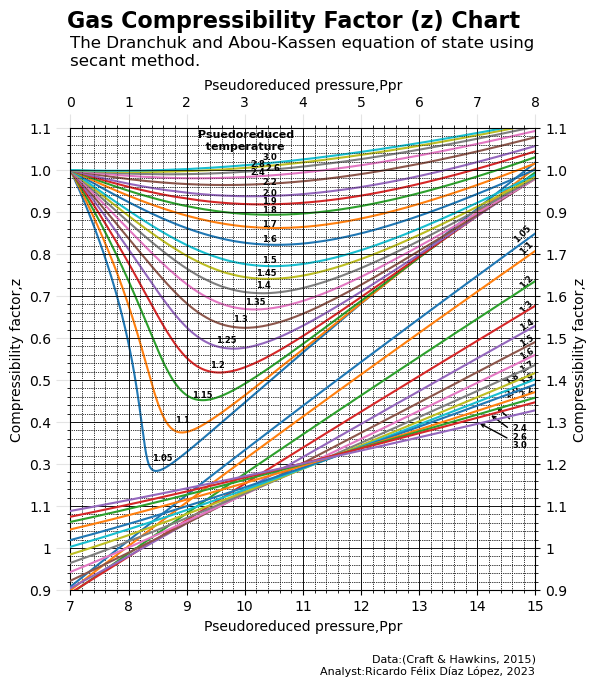

In [13]:
"""
Compresibility Gas Factor from 0 to 8 Ppr and z from 0 to 1.1 and the chart Gas Factor from 7 to 15
"""

#backgrouned info and defining the graph
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, label = "1")
ax2=fig.add_subplot(111, label="2", frame_on=False)
fig.patch.set(facecolor='white')

# setting axis limits of firts figure
ax.set_xlim(0,8)
ax.set_ylim(0,1.1)

# setting axis limits of second figure
ax2.set_xlim(7,15)
ax2.set_ylim(0.9,2)

# setting the ticks of first fugure
ax.set_xticks(range(9))
ax.set_yticks([i/10 for i in range(12)], [f'{i/10}' for i in range(12)])

# setting the ticks of second figure
ax2.set_xticks(range(7,16))
ax2.set_yticks([i/10 for i in range(9,21)], [f'{i/10}' for i in range(9,21)])

# Changing the axis y labels of first figure
ax.set_yticklabels([0.9, 1, 1.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1])

# Changing the axis y labels of second figure
ax2.set_yticklabels([0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 0.9, 1.0, 1.1])

# setting as our backgroun as  milimeter paper of first figure
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# setting as our backgroun as  milimeter paper for second figure
ax2.minorticks_on()
ax2.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax2.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# Preparing the tpr values of first figure
tpr_values = [
    1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5,
    1.6, 1.7, 1.8, 1.9, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0
]

# Preparing the tpr values for second figure
tpr_values_2 = [
    1.05, 1.1, 1.2, 1.3, 1.4, 1.5,1.6, 1.7,
    1.8, 1.9, 2.0, 2.2, 2.4, 2.6, 3.0
]

# Creating the points of ppr values to graph of first figure
ppr_values = np.linspace(0, 8, 400)

# Creating the points of ppr values to graph for second figure
ppr_values_2 = np.linspace(7, 15, 400)

# time to graph the 2-D plot of first figure
for tpr_value in tpr_values:
    z_factor_values = [z_factor(ppr, tpr_value) for ppr in ppr_values]
    ax.plot(ppr_values,
            z_factor_values,
            label=f'TPR = {tpr_value}')

# time to graph the 2-D plot for second figure
for tpr_value_2 in tpr_values_2:
    z_factor_values_2 = [z_factor(ppr, tpr_value_2) for ppr in ppr_values_2]
    ax2.plot(ppr_values_2,
             z_factor_values_2,
             label=f'TPR = {tpr_value}')

# extending horizontal tickmarks of first figure
ax.tick_params(which='major',
               length=10,
               color= '#E4E4E4')

# Adding the axis labels of first figure
ax.set_ylabel("Compressibility factor,z")
ax.set_xlabel("Pseudoreduced pressure,Ppr")

# Adding the axis labels of second figure
ax2.set_ylabel("Compressibility factor,z")
ax2.set_xlabel("Pseudoreduced pressure,Ppr")

# changin to the top the axis of first figure
ax.xaxis.tick_top()

# changin to the top the axis of second figure
ax2.yaxis.tick_right()

# Changing the x label position to the top of first figure
ax.xaxis.set_label_position('top')

# Changing the x label position to the top of second figure
ax2.yaxis.set_label_position('right')

# Adding the title 
ax.set_title("Gas Compressibility Factor (z) Chart",
             fontsize=16,
             x=0.48,
             y=1.2,
             fontweight='bold')

# Adding the subtitle
ax.text(s = 'The Dranchuk and Abou-Kassen equation of state using \nsecant method.',
        x = 0,
        y = 1.25,
        fontsize = 12)

# Adding me
ax.text(s = 'Analyst:Ricardo Félix Díaz López, 2023',
        x = 4.29,
        y = -0.2,
        fontsize = 8)

# Adding the source of data
ax.text(s = 'Data:(Craft & Hawkins, 2015)',
        x = 5.19,
        y = -0.17,
        fontsize = 8)

# Adding  labels
# the Tpr
ax.text(s = 'Psuedoreduced \n  temperature',
        x = 2.2,
        y = 1.05,
        fontsize = 8,
        fontweight='bold')

# next part it is just draw the labels of every tpr

ax.text(s = '3.0',
        x = 3.3,
        y = 1.025,
        fontsize = 6,
        fontweight='bold')

# 2.8
ax.text(s = '2.8',
        x = 3.1,
        y = 1.01,
        fontsize = 6,
        fontweight='bold')

# 2.6
ax.text(s = '2.6',
        x = 3.35,
        y = 1.0,
        fontsize = 6,
        fontweight='bold')

# 2.4
ax.text(s = '2.4',
        x = 3.1,
        y = 0.99,
        fontsize = 6,
        fontweight='bold')

# 2.2
ax.text(s = '2.2',
        x = 3.3,
        y = 0.965,
        fontsize = 6,
        fontweight='bold')

# 2.0
ax.text(s = '2.0',
        x = 3.3,
        y = 0.94,
        fontsize = 6,
        fontweight='bold')

# 1.9
ax.text(s = '1.9',
        x = 3.3,
        y = 0.92,
        fontsize = 6,
        fontweight='bold')

# 1.8
ax.text(s = '1.8',
        x = 3.3,
        y = 0.90,
        fontsize = 6,
        fontweight='bold')

# 1.7
ax.text(s = '1.7',
        x = 3.3,
        y = 0.865,
        fontsize = 6,
        fontweight='bold')

# 1.6
ax.text(s = '1.6',
        x = 3.3,
        y = 0.83,
        fontsize = 6,
        fontweight='bold')

# 1.5
ax.text(s = '1.5',
        x = 3.3,
        y = 0.78,
        fontsize = 6,
        fontweight='bold')

# 1.45
ax.text(s = '1.45',
        x = 3.2,
        y = 0.75,
        fontsize = 6,
        fontweight='bold')

# 1.4
ax.text(s = '1.4',
        x = 3.2,
        y = 0.72,
        fontsize = 6,
        fontweight='bold')

# 1.35
ax.text(s = '1.35',
        x = 3,
        y = 0.68,
        fontsize = 6,
        fontweight='bold')

# 1.3
ax.text(s = '1.3',
        x = 2.8,
        y = 0.64,
        fontsize = 6,
        fontweight='bold')

# 1.25
ax.text(s = '1.25',
        x = 2.5,
        y = 0.59,
        fontsize = 6,
        fontweight='bold')

# 1.2
ax.text(s = '1.2',
        x = 2.4,
        y = 0.53,
        fontsize = 6,
        fontweight='bold')

# 1.15
ax.text(s = '1.15',
        x = 2.1,
        y = 0.46,
        fontsize = 6,
        fontweight='bold')

# 1.1
ax.text(s = '1.1',
        x = 1.8,
        y = 0.4,
        fontsize = 6,
        fontweight='bold')

# 1.05
ax.text(s = '1.05',
        x = 1.4,
        y = 0.31,
        fontsize = 6,
        fontweight='bold')

# labels of the down side of chart
# setting properties of arrow
arrow_properties = dict(facecolor='black',
                        edgecolor='black',
                        arrowstyle='->')
# 3.0
ax.annotate('3.0',
            xy=(7.0, 0.4),
            xytext=(7.6 , 0.34 ),
            arrowprops=arrow_properties,
            fontsize = 6,
            fontweight='bold')

# 2.6
ax.annotate('2.6',
            xy=(7.2, 0.42),
            xytext=(7.6 , 0.36 ),
            arrowprops=arrow_properties,
            fontsize = 6,
            fontweight='bold')

#2.4
ax.annotate('2.4',
            xy=(7.3, 0.44),
            xytext=(7.6 , 0.38 ),
            arrowprops=arrow_properties,
            fontsize = 6,
            fontweight='bold')

# 2.2
ax.text(s = '2.2',
        x = 7.7,
        y = 0.46,
        fontsize = 6,
        fontweight='bold',
        rotation= 30)

# 2.0
ax.text(s = '2.0',
        x = 7.45,
        y = 0.46,
        fontsize = 6,
        fontweight='bold',
        rotation= 30)

# 1.9
ax.text(s = '1.9',
        x = 7.7,
        y = 0.49,
        fontsize = 6,
        fontweight='bold',
        rotation= 32)

# 1.8
ax.text(s = '1.8',
        x = 7.45,
        y = 0.49,
        fontsize = 6,
        fontweight='bold',
        rotation= 32)

# 1.7
ax.text(s = '1.7',
        x = 7.7,
        y = 0.52,
        fontsize = 6,
        fontweight='bold',
        rotation= 32)

# 1.6
ax.text(s = '1.6',
        x = 7.7,
        y = 0.55,
        fontsize = 6,
        fontweight='bold',
        rotation= 32)

# 1.5
ax.text(s = '1.5',
        x = 7.7,
        y = 0.58,
        fontsize = 6,
        fontweight='bold',
        rotation= 32)

# 1.4
ax.text(s = '1.4',
        x = 7.7,
        y = 0.62,
        fontsize = 6,
        fontweight='bold',
        rotation= 32)

# 1.3
ax.text(s = '1.3',
        x = 7.7,
        y = 0.66,
        fontsize = 6,
        fontweight='bold',
        rotation= 45)

# 1.2
ax.text(s = '1.2',
        x = 7.7,
        y = 0.72,
        fontsize = 6,
        fontweight='bold',
        rotation= 45)

# 1.1
ax.text(s = '1.1',
        x = 7.7,
        y = 0.8,
        fontsize = 6,
        fontweight='bold',
        rotation= 45)

# 1.05
ax.text(s = '1.05',
        x = 7.6,
        y = 0.83,
        fontsize = 6,
        fontweight='bold',
        rotation= 45)

plt.show();

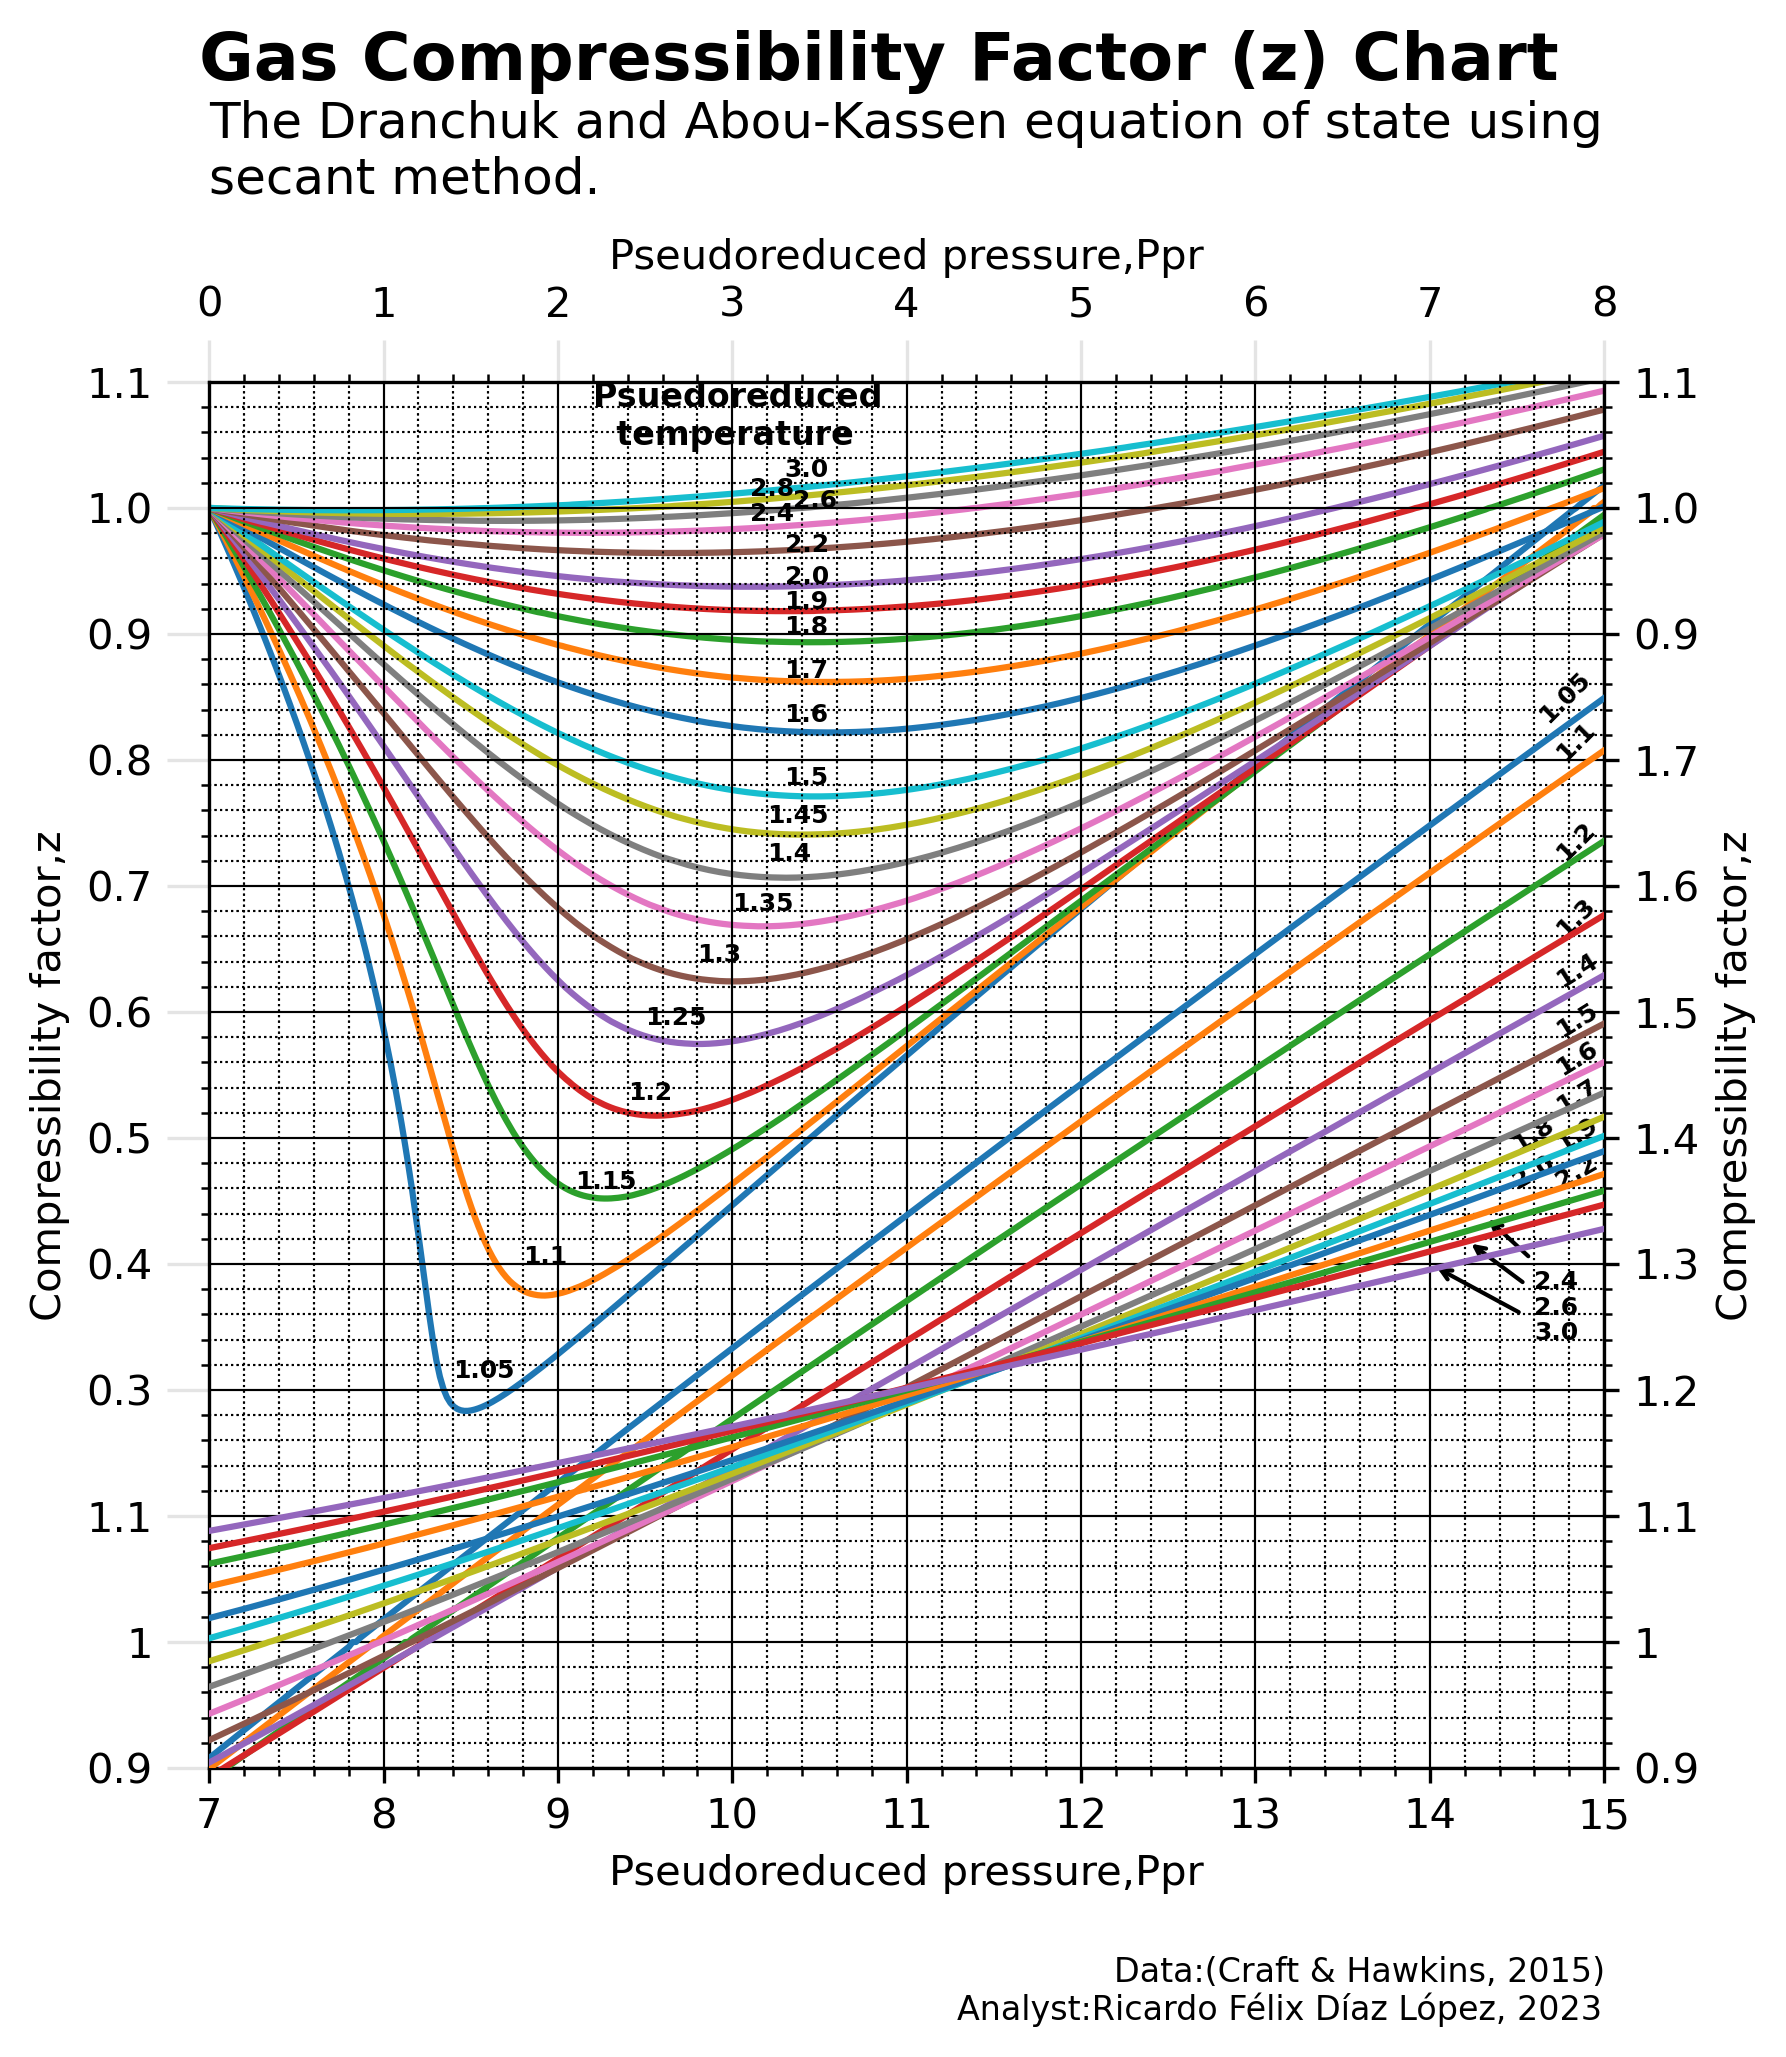

In [17]:
"""
Compresibility Gas Factor from 0 to 8 Ppr and z from 0 to 1.1 and the chart Gas Factor from 7 to 15
"""

#backgrouned info and defining the graph
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, label = "1")
ax2=fig.add_subplot(111, label="2", frame_on=False)
fig.patch.set(facecolor='white')

# setting axis limits of firts figure
ax.set_xlim(0,8)
ax.set_ylim(0,1.1)

# setting axis limits of second figure
ax2.set_xlim(7,15)
ax2.set_ylim(0.9,2)

# setting the ticks of first fugure
ax.set_xticks(range(9))
ax.set_yticks([i/10 for i in range(12)], [f'{i/10}' for i in range(12)])

# setting the ticks of second figure
ax2.set_xticks(range(7,16))
ax2.set_yticks([i/10 for i in range(9,21)], [f'{i/10}' for i in range(9,21)])

# Changing the axis y labels of first figure
ax.set_yticklabels([0.9, 1, 1.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1])

# Changing the axis y labels of second figure
ax2.set_yticklabels([0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 0.9, 1.0, 1.1])

# setting as our backgroun as  milimeter paper of first figure
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# setting as our backgroun as  milimeter paper for second figure
ax2.minorticks_on()
ax2.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax2.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# Preparing the tpr values of first figure
tpr_values = [
    1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5,
    1.6, 1.7, 1.8, 1.9, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0
]

# Preparing the tpr values for second figure
tpr_values_2 = [
    1.05, 1.1, 1.2, 1.3, 1.4, 1.5,1.6, 1.7,
    1.8, 1.9, 2.0, 2.2, 2.4, 2.6, 3.0
]

# Creating the points of ppr values to graph of first figure
ppr_values = np.linspace(0, 8, 400)

# Creating the points of ppr values to graph for second figure
ppr_values_2 = np.linspace(7, 15, 400)

# time to graph the 2-D plot of first figure
for tpr_value in tpr_values:
    z_factor_values = [z_factor(ppr, tpr_value) for ppr in ppr_values]
    ax.plot(ppr_values,
            z_factor_values,
            label=f'TPR = {tpr_value}')

# time to graph the 2-D plot for second figure
for tpr_value_2 in tpr_values_2:
    z_factor_values_2 = [z_factor(ppr, tpr_value_2) for ppr in ppr_values_2]
    ax2.plot(ppr_values_2,
             z_factor_values_2,
             label=f'TPR = {tpr_value}')

# extending horizontal tickmarks of first figure
ax.tick_params(which='major',
               length=10,
               color= '#E4E4E4')

# Adding the axis labels of first figure
ax.set_ylabel("Compressibility factor,z")
ax.set_xlabel("Pseudoreduced pressure,Ppr")

# Adding the axis labels of second figure
ax2.set_ylabel("Compressibility factor,z")
ax2.set_xlabel("Pseudoreduced pressure,Ppr")

# changin to the top the axis of first figure
ax.xaxis.tick_top()

# changin to the top the axis of second figure
ax2.yaxis.tick_right()

# Changing the x label position to the top of first figure
ax.xaxis.set_label_position('top')

# Changing the x label position to the top of second figure
ax2.yaxis.set_label_position('right')

# Adding the title 
ax.set_title("Gas Compressibility Factor (z) Chart",
             fontsize=16,
             x=0.48,
             y=1.2,
             fontweight='bold')

# Adding the subtitle
ax.text(s = 'The Dranchuk and Abou-Kassen equation of state using \nsecant method.',
        x = 0,
        y = 1.25,
        fontsize = 12)

# Adding me
ax.text(s = 'Analyst:Ricardo Félix Díaz López, 2023',
        x = 4.29,
        y = -0.2,
        fontsize = 8)

# Adding the source of data
ax.text(s = 'Data:(Craft & Hawkins, 2015)',
        x = 5.19,
        y = -0.17,
        fontsize = 8)

# Adding  labels
# the Tpr
ax.text(s = 'Psuedoreduced \n  temperature',
        x = 2.2,
        y = 1.05,
        fontsize = 8,
        fontweight='bold')

# Now is time to draw all label of tpr and this probably the part that i hate the most because i did 
# not fine a easy way to do it.
# setting the data for the labels of the upper part of the figure
data = [
    ('3.0', 3.3, 1.025),
    ('2.8', 3.1, 1.01),
    ('2.6', 3.35, 1.0),
    ('2.4', 3.1, 0.99),
    ('2.2', 3.3, 0.965),
    ('2.0', 3.3, 0.94),
    ('1.9', 3.3, 0.92),
    ('1.8', 3.3, 0.90),
    ('1.7', 3.3, 0.865),
    ('1.6', 3.3, 0.83),
    ('1.5', 3.3, 0.78),
    ('1.45', 3.2, 0.75),
    ('1.4', 3.2, 0.72),
    ('1.35', 3, 0.68),
    ('1.3', 2.8, 0.64),
    ('1.25', 2.5, 0.59),
    ('1.2', 2.4, 0.53),
    ('1.15', 2.1, 0.46),
    ('1.1', 1.8, 0.4),
    ('1.05', 1.4, 0.31)
]

# time to draw the labels for the upper side of the figure with our data
for text_data in data:
    ax.text(s=text_data[0],
            x=text_data[1],
            y=text_data[2],
            fontsize=6,
            fontweight='bold')

# settin the arrow properties for our labels for the down side of the figure   
arrow_properties = dict(facecolor='black',
                        edgecolor='black',
                        arrowstyle='->')   

# writing the necesary information for our labels wiht arrows 
annotations = [
    ('3.0', (7.0, 0.4), (7.6, 0.34)),
    ('2.6', (7.2, 0.42), (7.6, 0.36)),
    ('2.4', (7.3, 0.44), (7.6, 0.38)),
]

# Setting our for cicle for labels with arrows in the down side of the figure
for label, xy, xytext in annotations:
    ax.annotate(label,
                xy=xy,
                xytext=xytext,
                arrowprops=arrow_properties,
                fontsize=6,
                fontweight='bold')

# Writing our information for the labels in the down side of the chart tha doesn't have arrow
rotation_data = [
    ('2.2', 7.7, 0.46, 30),
    ('2.0', 7.45, 0.46, 30),
    ('1.9', 7.7, 0.49, 32),
    ('1.8', 7.45, 0.49, 32),
    ('1.7', 7.7, 0.52, 32),
    ('1.6', 7.7, 0.55, 32),
    ('1.5', 7.7, 0.58, 32),
    ('1.4', 7.7, 0.62, 32),
    ('1.3', 7.7, 0.66, 45),
    ('1.2', 7.7, 0.72, 45),
    ('1.1', 7.7, 0.8, 45),
    ('1.05', 7.6, 0.83, 45),
]

# finally, doing our for cicle for the label for the down side of the figure with out arrow
for text_data in rotation_data:
    ax.text(s=text_data[0],
            x=text_data[1],
            y=text_data[2],
            fontsize=6,
            fontweight='bold', 
            rotation=text_data[3])
    
# adjust resolution (dpi)
#plt.gcf().set_dpi(300)

# save figure
#plt.savefig('factor chart complete with labels', dpi=300, bbox_inches='tight')
    
plt.show();